문제 1: 붓꽃 데이터셋에서 품종 예측하기
문제 설명: 주어진 붓꽃 데이터셋을 사용하여 꽃받침(sepal)과 꽃잎(petal) 길이 및 너비를 바탕으로 붓꽃의 품종(Setosa, Versicolor, Virginica)을 예측하는 모델을 만드세요.

데이터 전처리: 데이터셋에서 결측치가 있는지 확인하고, 필요하다면 전처리하세요.
모델 선택: 의사결정 트리(Decision Tree) 모델을 사용하여 학습시키세요.
성능 평가: 테스트 데이터에서의 정확도(Accuracy)를 측정하세요.


In [5]:
# 의사결정 트리 모델을 사용하여 품종을 예측
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터셋 로드 및 전처리
df = sns.load_dataset('iris')
X = df.iloc[:, :-1]  # 특성 데이터
y = df['species']  # 레이블 (품종)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 데이터 정확도: {accuracy:.2f}")

테스트 데이터 정확도: 1.00


문제 2: K-평균 클러스터링을 이용한 군집 분석
문제 설명: 붓꽃 데이터를 이용해 K-평균(K-Means) 알고리즘을 적용하고, 붓꽃 품종을 3개의 클러스터로 군집화한 후 결과를 시각화하세요.

K-평균 클러스터링 적용: KMeans 알고리즘을 사용하여 군집을 분류하세요.
차원 축소: PCA를 사용해 데이터를 2D로 축소하여 시각화하세요.
결과 분석: 클러스터링 결과를 실제 품종과 비교하세요.

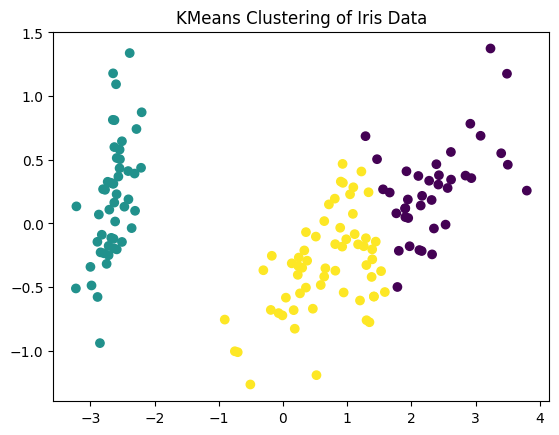

In [6]:
# KMeans 클러스터링 적용 및 시각화
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# KMeans 적용
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('KMeans Clustering of Iris Data')
plt.show()

문제 3: 로지스틱 회귀를 사용한 붓꽃 품종 분류
문제 설명: 로지스틱 회귀(Logistic Regression)를 사용하여 붓꽃의 세 가지 품종을 예측하는 모델을 만드세요.

로지스틱 회귀 모델 학습: 주어진 데이터를 사용하여 모델을 학습시키세요.
성능 평가: 정확도, 정밀도(Precision), 재현율(Recall), F1 점수를 계산하세요.

In [7]:

# 로지스틱 회귀 모델을 사용하여 붓꽃 품종 예측
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



문제 4: 랜덤 포레스트를 사용한 중요 특성 추출
문제 설명: 랜덤 포레스트(Random Forest)를 사용하여 붓꽃 데이터에서 각 특성이 품종 예측에 얼마나 중요한지를 분석하세요.

랜덤 포레스트 모델 학습: 모델을 학습시키고, 특성 중요도를 추출하세요.
결과 시각화: 각 특성의 중요도를 바 차트로 시각화하세요.

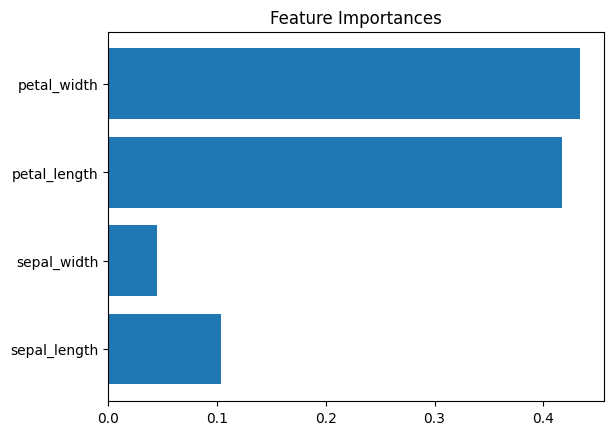

In [8]:


# 랜덤 포레스트를 사용한 특성 중요도 분석
from sklearn.ensemble import RandomForestClassifier

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 특성 중요도 출력 및 시각화
importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.title('Feature Importances')
plt.show()

문제 5: SVM을 사용한 품종 분류
문제 설명: 서포트 벡터 머신(SVM)을 사용하여 붓꽃 데이터의 품종을 분류하세요.

SVM 모델 학습: 선형 SVM 모델을 사용하여 품종을 예측하세요.
결과 분석: Confusion Matrix를 사용하여 성능을 평가하고 시각화하세요.

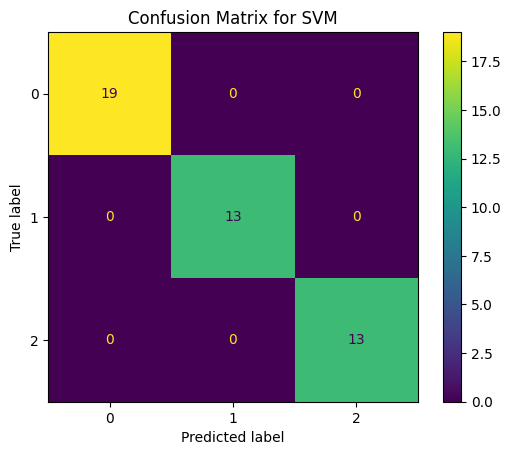

In [9]:

# SVM 모델을 사용한 품종 분류
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# SVM 모델 학습
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# 예측 및 혼돈 행렬 시각화
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for SVM')
plt.show()